In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def deg_2_rad(deg):
    return deg / 180 * np.pi

In [3]:
def determine_region_plane_wave(ear_angle, source_azimuth):
    """
    Determine the region (B1, B2, B3, B4, B5) based on ear angle and source azimuth
    for a plane wave model.

    Parameters:
        ear_angle (float): Ear angle in degrees (\u03b8_E).
        source_azimuth (float): Source azimuth in degrees (\u03b8).

    Returns:
        int: Region number (1 for B1, 2 for B2, ..., 5 for B5).
    """
    exp1 = 180 - ear_angle
    exp2 = ear_angle - 90
    exp3 = 270 - ear_angle

    # Region determination logic
    if source_azimuth <= exp1:
        if source_azimuth <= exp2:
            return 1 #B1
        else:
            return 2 #B2
    else:
        if source_azimuth <= exp2:
            return 5 #B5
        else:
            if source_azimuth > exp3:
                return 4 #B4
            else:
                return 3 #B3

In [4]:
def determine_region_point_source(ear_angle, source_azimuth, a, r):
    """
    Determine the region (C1, C2, C3, C4, C5, C6) based on ear angle and source azimuth.

    Parameters:
        ear_angle (float): Ear angle in degrees (\u03b8_E).
        source_azimuth (float): Source azimuth in degrees (\u03b8).
        r (float): Source distance.
        a (float): Head radius.

    Returns:
        int: Region number (1 for C1, 2 for C2, ..., 6 for C6).
    """
    gamma = np.degrees(np.arccos(a / r))

    exp1 = 180 - ear_angle
    exp2 = ear_angle - gamma
    exp3 = ear_angle + gamma
    exp4 = 360 - gamma - ear_angle

    # Region determination logic
    if source_azimuth <= exp1:
        if source_azimuth <= exp2:
            return 1  # C1
        else:
            return 2  # C2
    else:
        if source_azimuth <= exp2:
            return 5  # C5
        else:
            if source_azimuth > exp4:
                return 4  # C4
            elif source_azimuth > exp3:
                return 6  # C6
            else:
                return 3  # C3

In [5]:
# Parameters
a = 1
r = 2

# Define ranges for ear_angle and source_azimuth
ear_angles = range(90, 181, 1)
source_azimuths = range(0, 181, 1)

# Create a grid for plotting
X, Y = np.meshgrid(ear_angles, source_azimuths)
Z_point_source = np.zeros_like(X, dtype=int)
Z_plane_wave = np.zeros_like(X, dtype=int)

# Determine regions for each combination of ear_angle and source_azimuth
for i, ear_angle in enumerate(ear_angles):
    for j, source_azimuth in enumerate(source_azimuths):
        Z_point_source[j, i] = determine_region_point_source(ear_angle, source_azimuth, a, r)
        Z_plane_wave[j, i] = determine_region_plane_wave(ear_angle, source_azimuth)

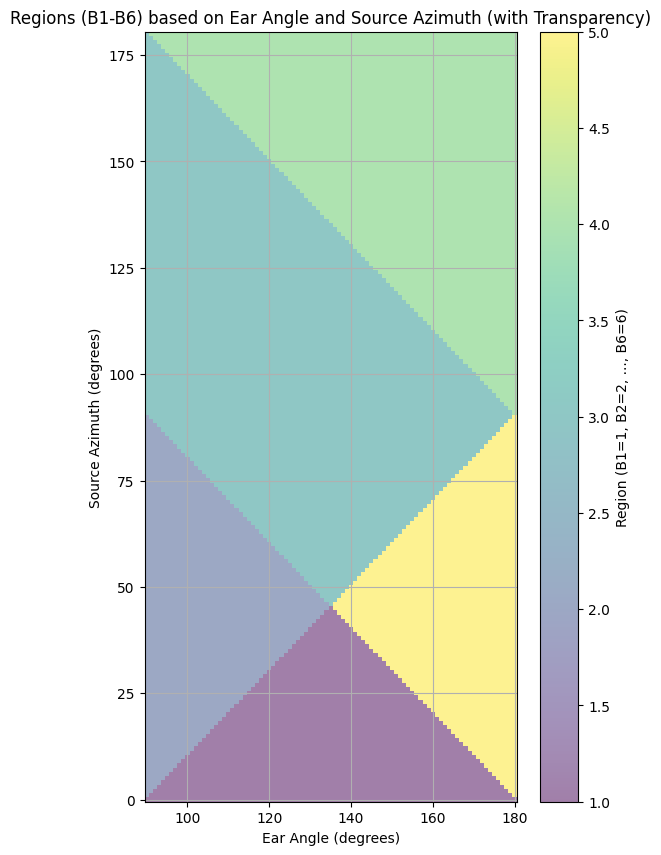

In [6]:
# Plot the regions 
plt.figure(figsize=(6, 10))
plt.pcolormesh(X, Y, Z_plane_wave, alpha=0.5)
plt.colorbar(label="Region (B1=1, B2=2, ..., B6=6)")
plt.xlabel("Ear Angle (degrees)")
plt.ylabel("Source Azimuth (degrees)")
plt.title("Regions (B1-B6) based on Ear Angle and Source Azimuth (with Transparency)")
plt.grid()
plt.show()

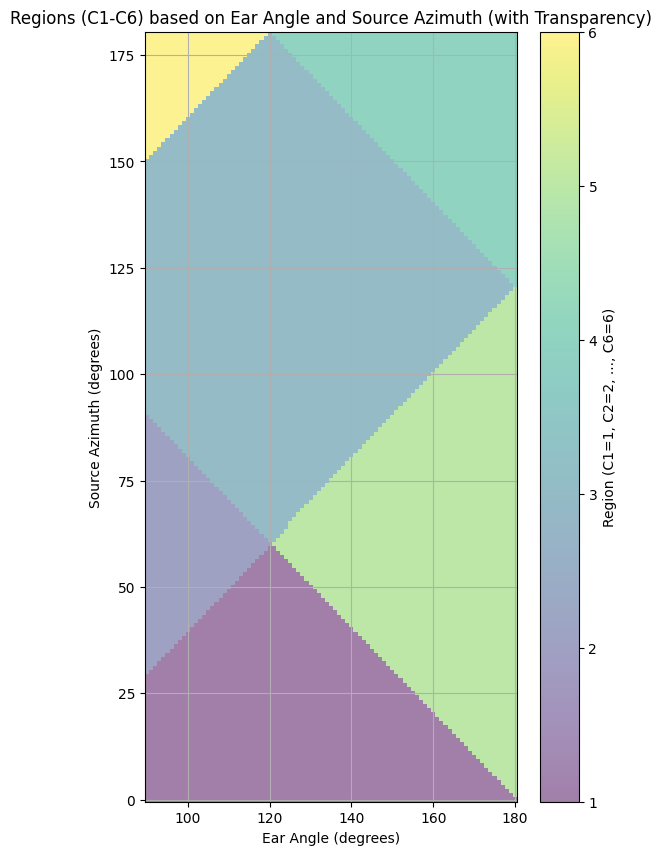

In [7]:
# Plot the regions
plt.figure(figsize=(6, 10))
plt.pcolormesh(X, Y, Z_point_source, alpha=0.5)
plt.colorbar(label="Region (C1=1, C2=2, ..., C6=6)")
plt.xlabel("Ear Angle (degrees)")
plt.ylabel("Source Azimuth (degrees)")
plt.title("Regions (C1-C6) based on Ear Angle and Source Azimuth (with Transparency)")
plt.grid()
plt.show()

In [8]:
def compute_ITD_plane_wave(index, a_over_c, theta_src, theta_ear):
    if index == 1:
        return 2 * a_over_c * theta_src
    elif index == 2:
        return a_over_c * (-np.pi/2+theta_src+theta_ear+np.cos(theta_src-theta_ear))
    elif index == 3:
        return a_over_c * (3*np.pi/2-theta_src-theta_ear+np.cos(theta_src-theta_ear))
    elif index == 4:
        return a_over_c * (np.cos(theta_src-theta_ear)-np.cos(theta_src+theta_ear))
    elif index == 5:
        return 2 * a_over_c * (np.pi - theta_ear)

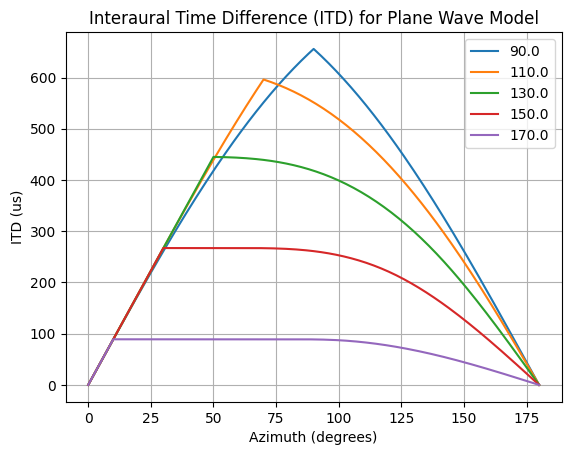

In [9]:
a = 0.0875
c = 343
a_over_c = a / c
thetas = np.radians([90, 110, 130, 150, 170])

# Source azimuth range
azimuths = np.linspace(0, np.pi, 181) 

for theta_e in thetas:
    itd_values = []
    for index, azimuth in enumerate(azimuths):
        region = determine_region_plane_wave(np.degrees(theta_e), np.degrees(azimuth))
        itd = compute_ITD_plane_wave(region, a_over_c, azimuth, theta_e)
        sec_to_us = 10**6
        itd_values.append(itd * sec_to_us)
    plt.plot(np.degrees(azimuths), itd_values, label=np.degrees(theta_e))

plt.xlabel("Azimuth (degrees)")
plt.ylabel("ITD (us)")
plt.title("Interaural Time Difference (ITD) for Plane Wave Model")
plt.grid(True)
plt.legend()
plt.show()

In [10]:
def compute_ITD_point_source(index, a_over_c, theta_src, theta_ear, gamma, rho):
    if index == 1:
        return 2 * a_over_c * theta_src
    elif index == 2:
        return a_over_c * (theta_src + theta_ear - gamma + 
                           np.sqrt(rho * rho - 1) - 
                           np.sqrt(1 + rho * rho - 2 * rho * np.cos(theta_src-theta_ear)))
    elif index == 3:
        return a_over_c * (2 * np.pi - gamma - theta_src - theta_ear + 
                           np.sqrt(rho * rho - 1) - 
                           np.sqrt(1 + rho * rho - 2 * rho * np.cos(theta_src-theta_ear)))
    elif index == 4:
        return a_over_c * (np.sqrt(1 + rho * rho - 2 * rho * np.cos(theta_src+theta_ear)) - 
                           np.sqrt(1 + rho * rho - 2 * rho * np.cos(theta_src-theta_ear)))
    elif index == 5:
        return 2 * a_over_c * (np.pi - theta_ear)
    elif index == 6:
        return 2 * a_over_c * (np.pi - theta_src)

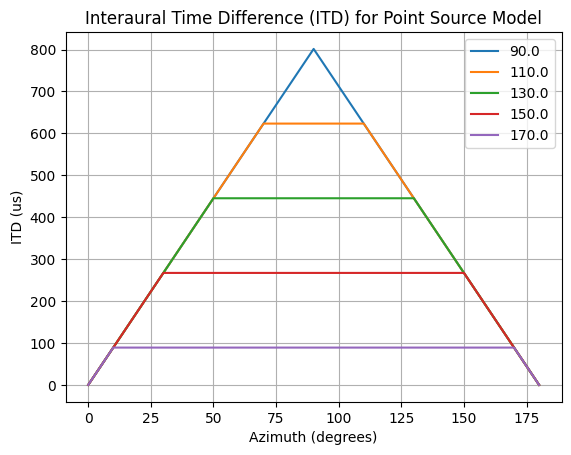

In [11]:
a = 0.0875
r = 0.0875
c = 343
a_over_c = a / c
thetas = np.radians([90, 110, 130, 150, 170])
gamma = np.arccos(a / r)
rho = r / a

# Source azimuth range
azimuths = np.linspace(0, np.pi, 181) 

for theta_e in thetas:
    itd_values = []
    for index, azimuth in enumerate(azimuths):
        region = determine_region_point_source(np.degrees(theta_e), np.degrees(azimuth), a, r)
        itd = compute_ITD_point_source(region, a_over_c, azimuth, theta_e, gamma, rho)
        sec_to_us = 10**6
        itd_values.append(itd * sec_to_us)
    plt.plot(np.degrees(azimuths), itd_values, label=np.degrees(theta_e))

plt.xlabel("Azimuth (degrees)")
plt.ylabel("ITD (us)")
plt.title("Interaural Time Difference (ITD) for Point Source Model")
plt.grid(True)
plt.legend()
plt.show()

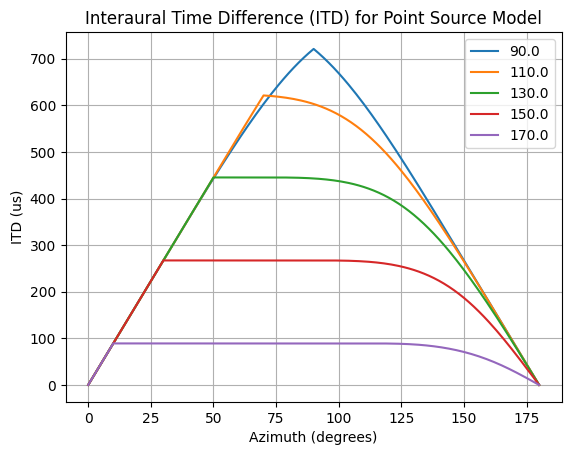

In [12]:
a = 0.0875
r = 0.0875*2
c = 343
a_over_c = a / c
thetas = np.radians([90, 110, 130, 150, 170])
gamma = np.arccos(a / r)
rho = r / a

# Source azimuth range
azimuths = np.linspace(0, np.pi, 181) 

for theta_e in thetas:
    itd_values = []
    for index, azimuth in enumerate(azimuths):
        region = determine_region_point_source(np.degrees(theta_e), np.degrees(azimuth), a, r)
        itd = compute_ITD_point_source(region, a_over_c, azimuth, theta_e, gamma, rho)
        sec_to_us = 10**6
        itd_values.append(itd * sec_to_us)
    plt.plot(np.degrees(azimuths), itd_values, label=np.degrees(theta_e))

plt.xlabel("Azimuth (degrees)")
plt.ylabel("ITD (us)")
plt.title("Interaural Time Difference (ITD) for Point Source Model")
plt.grid(True)
plt.legend()
plt.show()